**Brian Blaylock**  
**June 22, 2020**  

# 📔 Publication Figures
Based on the [AMS Publication Style Guide](https://www.ametsoc.org/index.cfm/aMS/publications/authors/journal-and-bams-authors/figure-information-for-authors/).

## Image Size

For some reason, when I set the figsize width to match the AMS figure width, **the saved image is always 0.2 inches shorter than expected**. So, I need to set my figsize as 0.2 wider than the set width.

|Figure Width| Width in Inches| `plt` figsize width |
|--|--|-------|
|One Column| 3.2 inches | 3.4
|2/3 page| 4.5 inches | 4.7
|Two Columns | 5.5 inches | 5.7
|> Two Columns | 6.5 inches | 6.7

## Dots Per Inch

|Figure Type | dots per inch |
|--|--|
|Monochrome (black and white line art)| 1000-1200 dpi
|greyscale/color image with text | 600-900 dpi
|greyscale/color image w/o test | 300 dpi

## Brian's Style Sheet
Use Brian's default style sheet. This sets the default figuresize as 5.7x3.5 (Same as the 2/3 page AMS figure size) with a dpi of 300. It also sets font sizes and a grid to something that I think looks like an overal good figure. This is appropriate for development, pasting into PowerPoints, and using in publications.

    plt.style.use('../BB_style.mplstyle')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Brian's Style for AMS publication
plt.style.use('../BB_style.mplstyle')

## Single Figure of each size

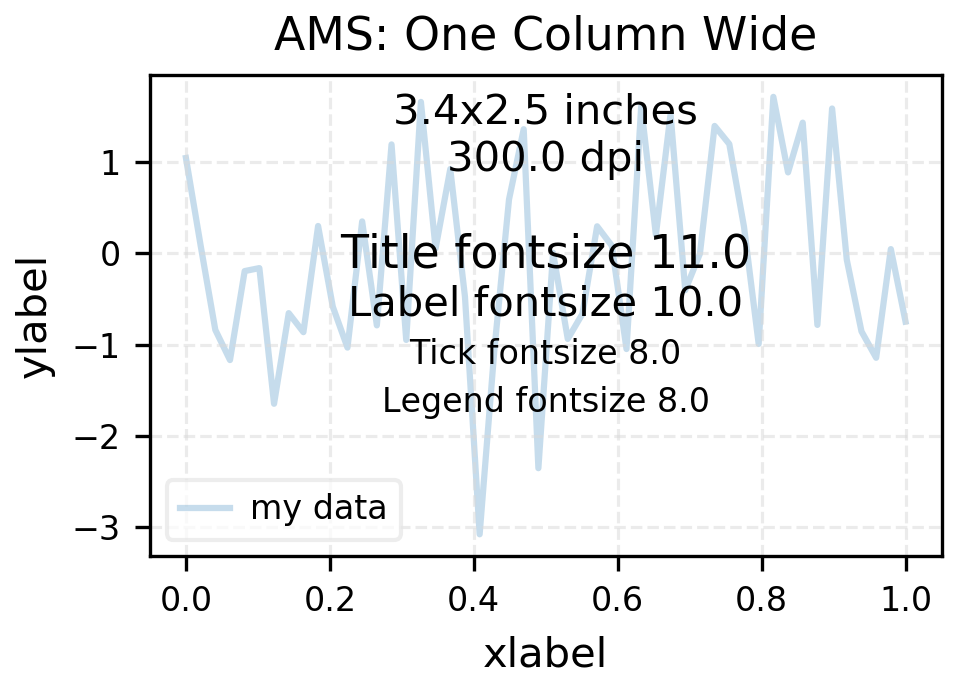

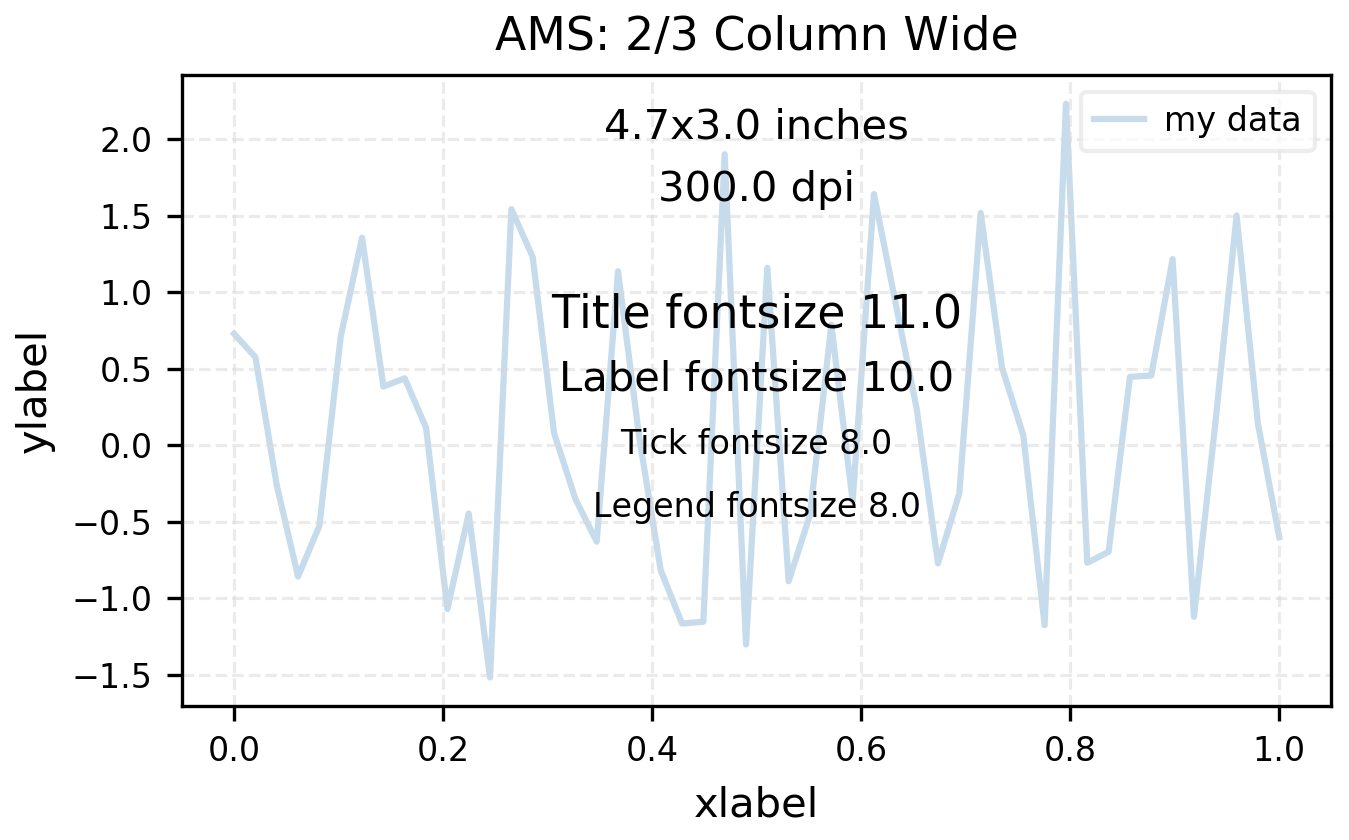

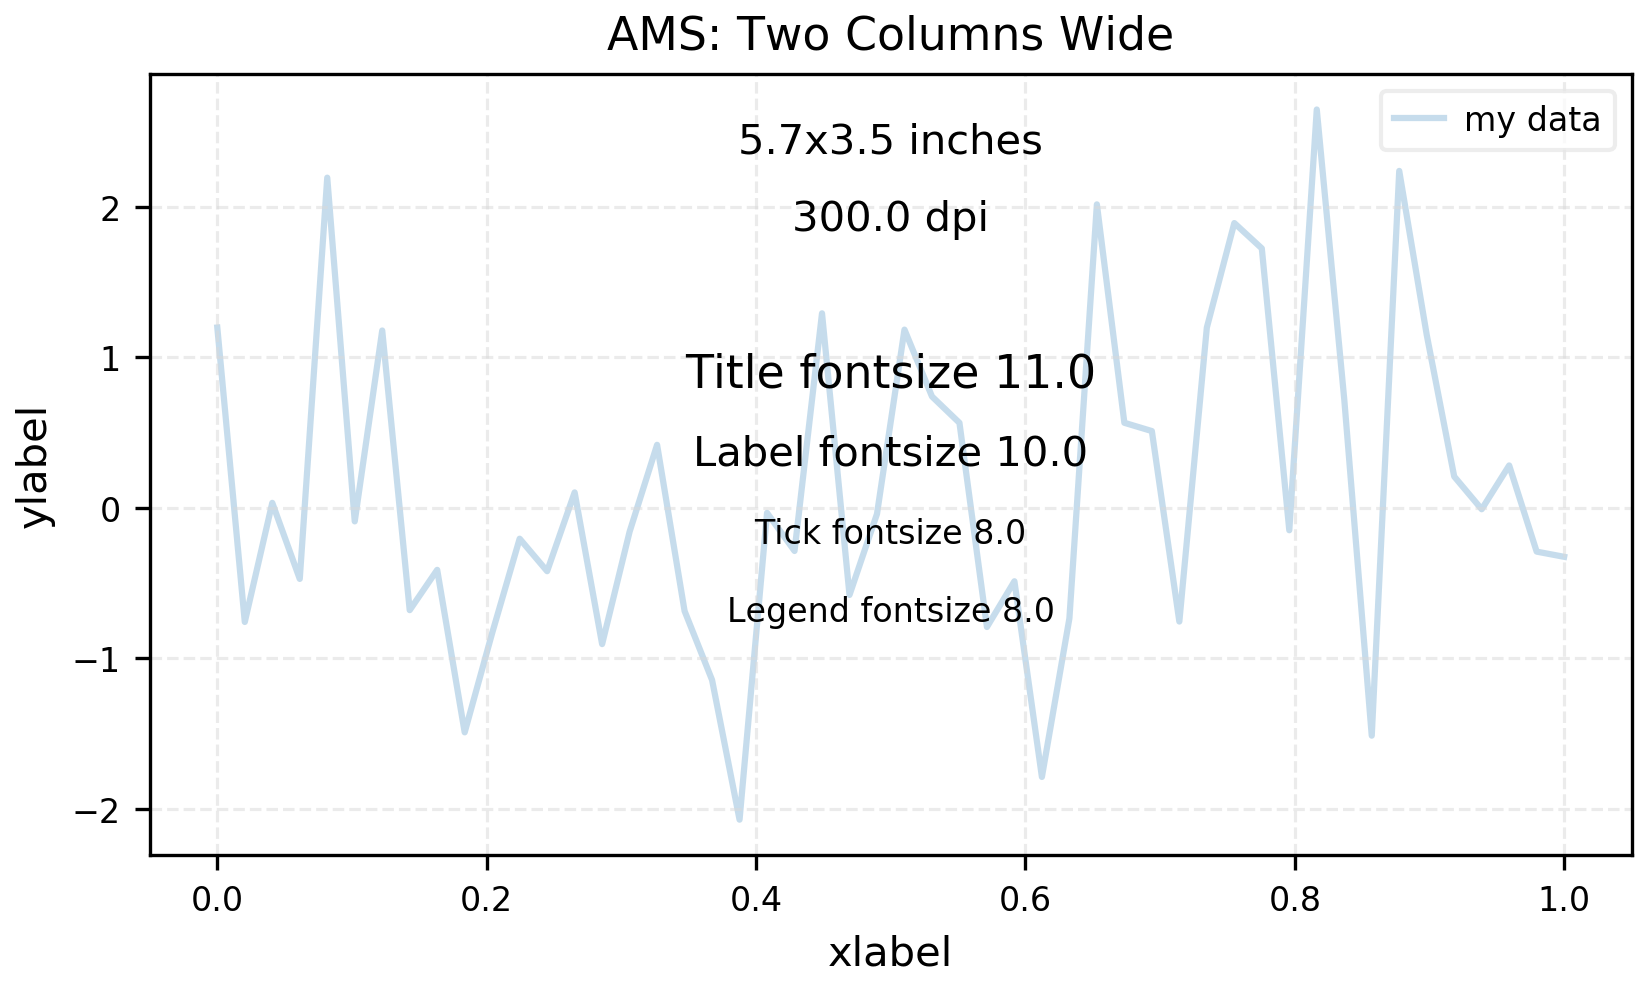

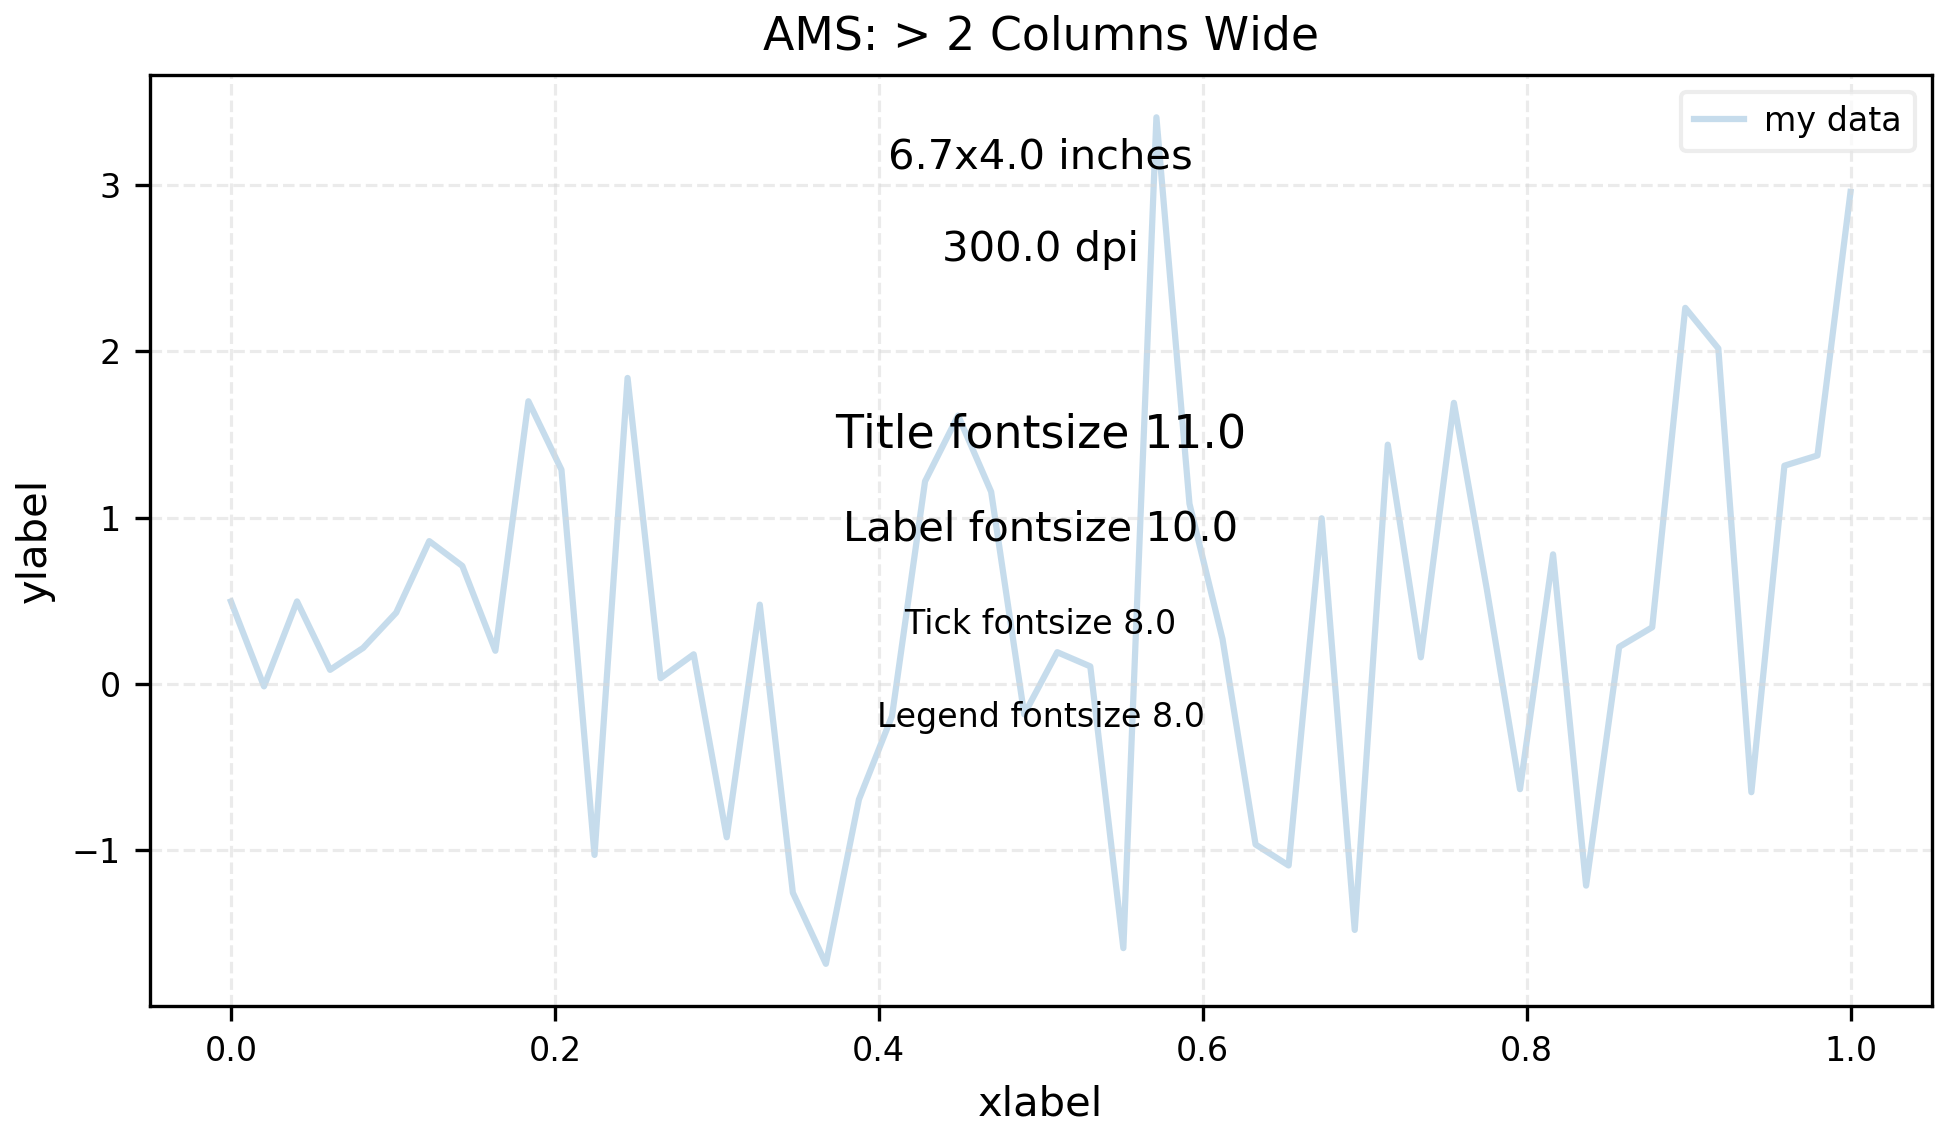

In [6]:
title_size = [
    ['AMS: One Column Wide', (3.4, 2.5)],
    ['AMS: 2/3 Column Wide', (4.7, 3)],
    ['AMS: Two Columns Wide', (5.7, 3.5)],
    ['AMS: > 2 Columns Wide', (6.7, 4)]
]

for top_title, size in title_size:
    fig = plt.figure(figsize=size)

    x = np.linspace(0,1,50)
    y = np.random.normal(0,1,50)
    plt.plot(x, y, zorder=0, alpha=.25, label='my data')
    
    title = plt.title(top_title)
    xlabel = plt.xlabel('xlabel')
    ylabel = plt.ylabel('ylabel')
    leg = plt.legend()

    kwargs = {'transform': plt.gca().transAxes,
              'horizontalalignment': 'center'}
    plt.text(.5, .9, f'{fig.get_figwidth():.1f}x{fig.get_figheight()} inches', **kwargs)
    plt.text(.5, .8, f'{fig.get_dpi()} dpi', **kwargs)
    plt.text(.5, .6, f'Title fontsize {title.get_fontsize()}',
             fontsize=title.get_fontsize(), **kwargs)
    plt.text(.5, .5, f'Label fontsize {xlabel.get_fontsize()}',
             fontsize=xlabel.get_fontsize(), **kwargs)
    plt.text(.5, .4, f'Tick fontsize {plt.gca().xaxis.get_major_ticks()[0].label.get_fontsize()}',
             fontsize=plt.gca().xaxis.get_major_ticks()[0].label.get_fontsize(), **kwargs)
    plt.text(.5, .3, f'Legend fontsize {leg.texts[0].get_fontsize()}',
             fontsize=leg.texts[0].get_fontsize(), **kwargs)

    plt.tight_layout()

    saveName = top_title.replace(":","_").replace(' ', '').replace('/', '').replace('>', 'gt')
    plt.savefig(saveName, bbox_inches='tight')

## Subplots

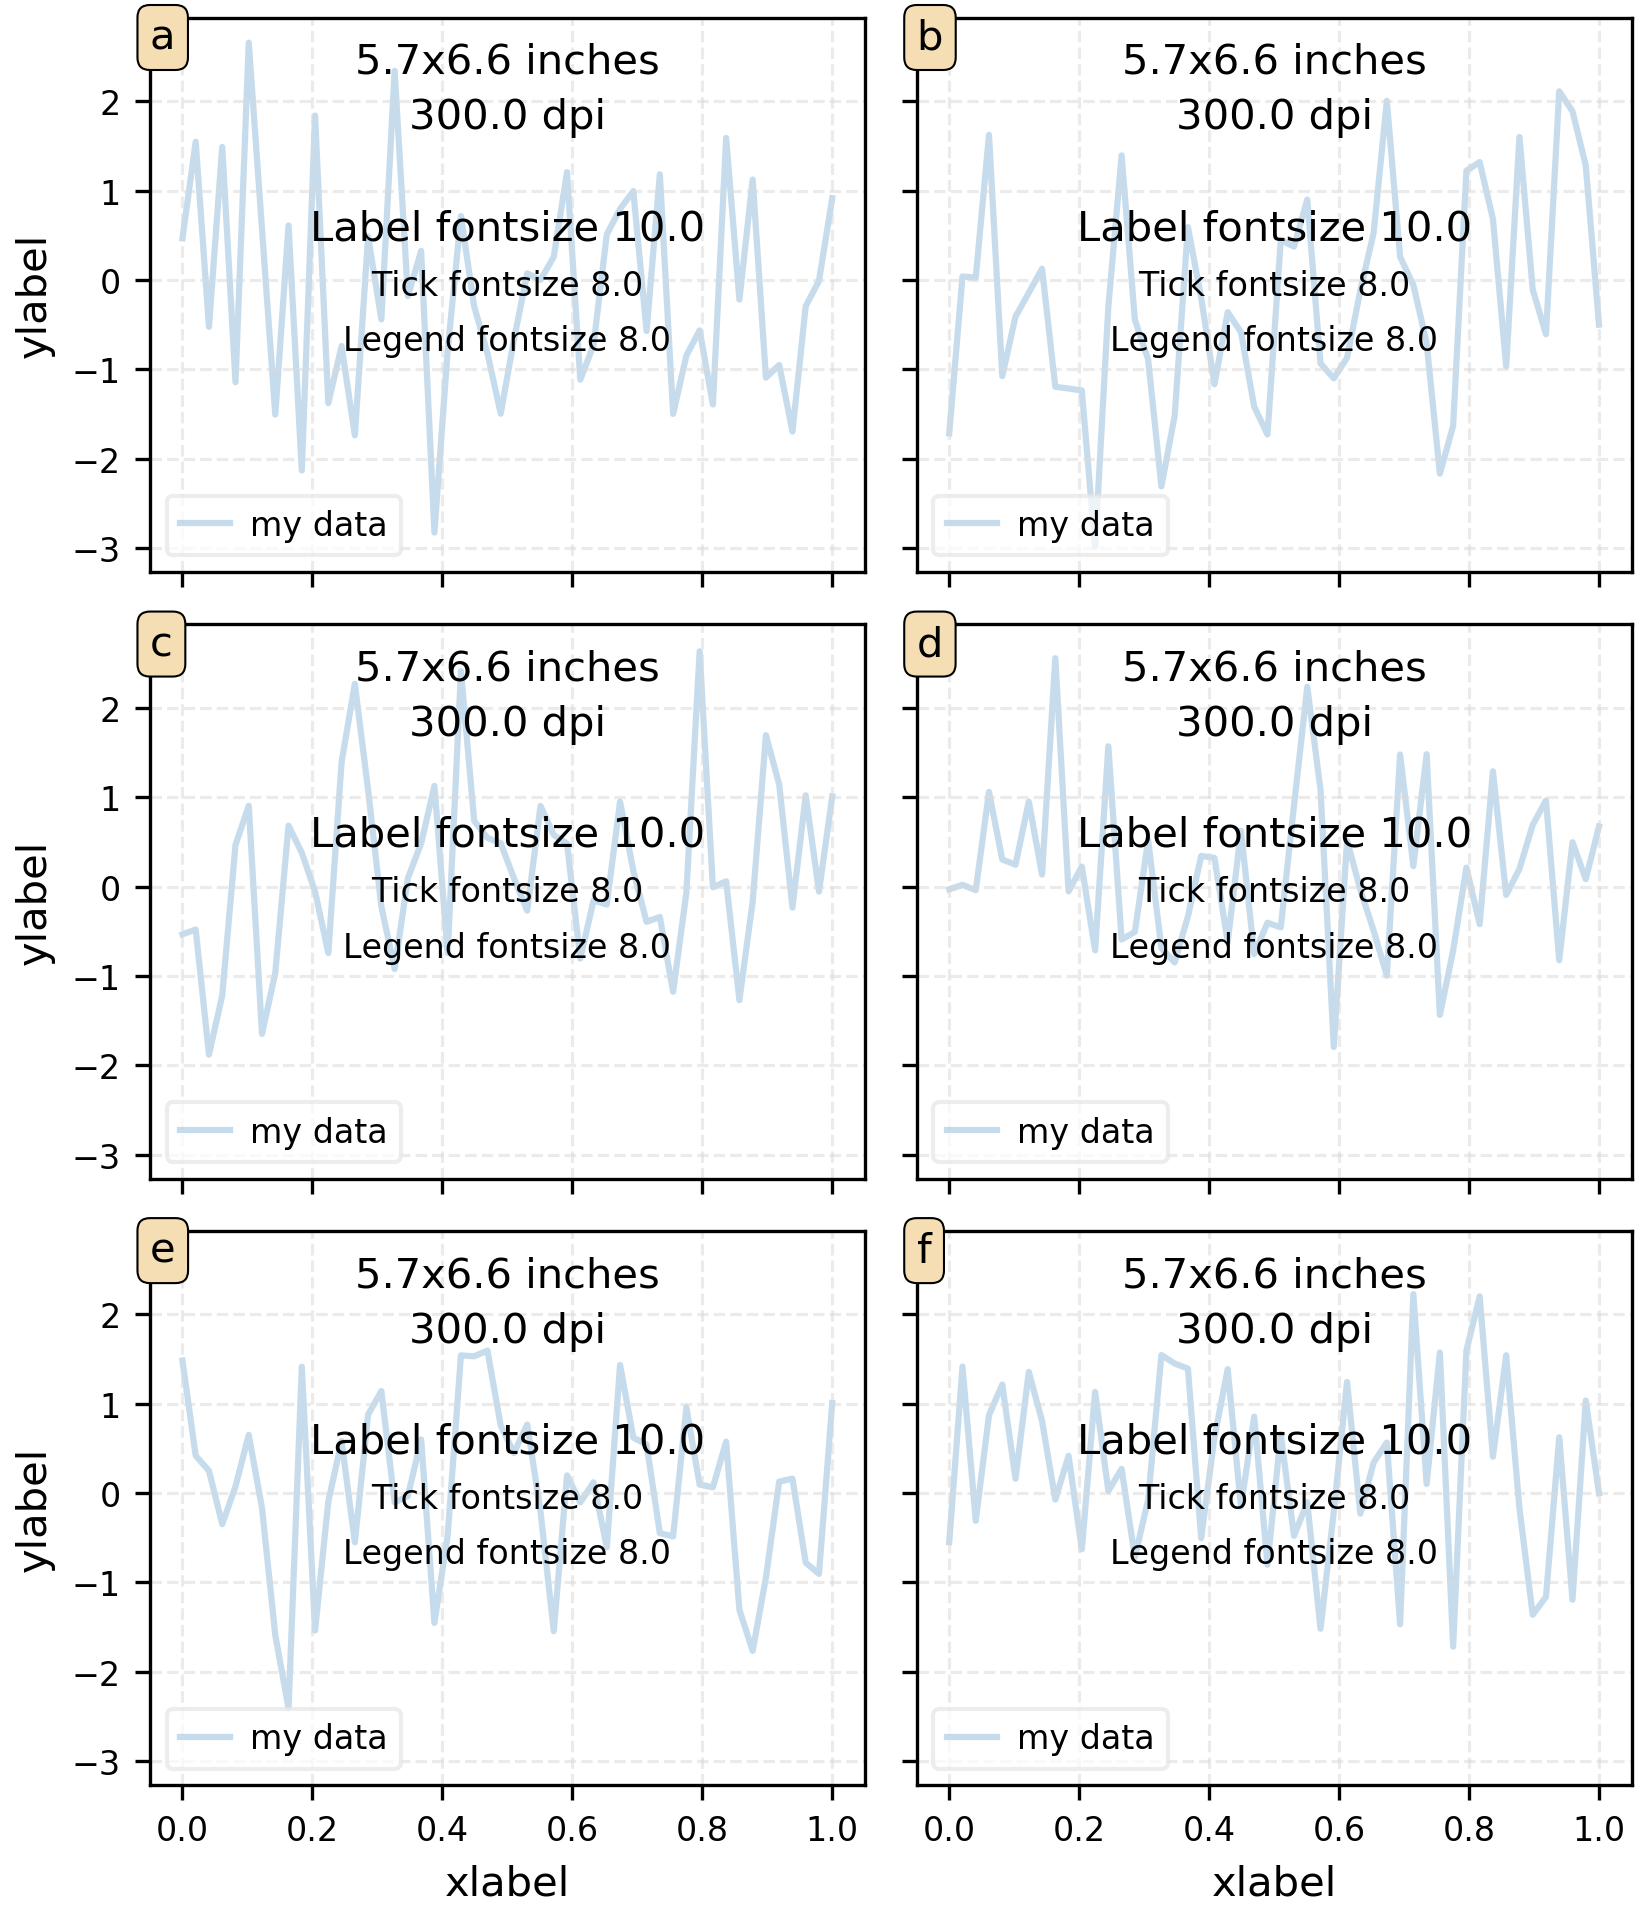

In [59]:
# Use the string of lowercase letters to label plots
import string

size = (5.7, 6.6)
fig, axes = plt.subplots(3, 2, figsize=size, sharex=True, sharey=True)

for i, (ax, letter) in enumerate(zip(axes.flat, string.ascii_lowercase)):
    plt.sca(ax)
    x = np.linspace(0,1,50)
    y = np.random.normal(0,1,50)
    plt.plot(x, y, zorder=0, alpha=.25, label='my data')

    if i in [4, 5]:
        xlabel = plt.xlabel('xlabel')
    if i in [0, 2, 4]:
        ylabel = plt.ylabel('ylabel')
    leg = plt.legend(loc=3)

    
    # Add figure letter
    box_prop = dict(boxstyle='round',
                    facecolor='wheat',
                    alpha=1,
                    linewidth=.5)
    plt.text(0, 1, f'{letter}', 
             transform=ax.transAxes, 
             va='top', 
             ha='left', 
             bbox=box_prop)
    
    
    kwargs = {'transform': plt.gca().transAxes,
              'horizontalalignment': 'center'}
    plt.text(.5, .9, f'{fig.get_figwidth()}x{fig.get_figheight()} inches', **kwargs)
    plt.text(.5, .8, f'{fig.get_dpi()} dpi', **kwargs)
    #plt.text(.5, .7, f'Title fontsize {title.get_fontsize()}',
    #         fontsize=title.get_fontsize(), **kwargs)
    plt.text(.5, .6, f'Label fontsize {xlabel.get_fontsize()}',
             fontsize=xlabel.get_fontsize(), **kwargs)
    plt.text(.5, .5, f'Tick fontsize {plt.gca().xaxis.get_major_ticks()[0].label.get_fontsize()}',
             fontsize=plt.gca().xaxis.get_major_ticks()[0].label.get_fontsize(), **kwargs)
    plt.text(.5, .4, f'Legend fontsize {leg.texts[0].get_fontsize()}',
             fontsize=leg.texts[0].get_fontsize(), **kwargs)

plt.tight_layout()

saveName = top_title.replace(":","_").replace(' ', '').replace('/', '').replace('>', 'gt')

plt.savefig('AMS_TwoColumn_subplot', bbox_inches='tight')